In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [161]:
P = np.random.randn(2, 100)
theta = np.pi/3
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]])
t = np.array([[.5], [2]])
s = 2

Q = s*R@P + t

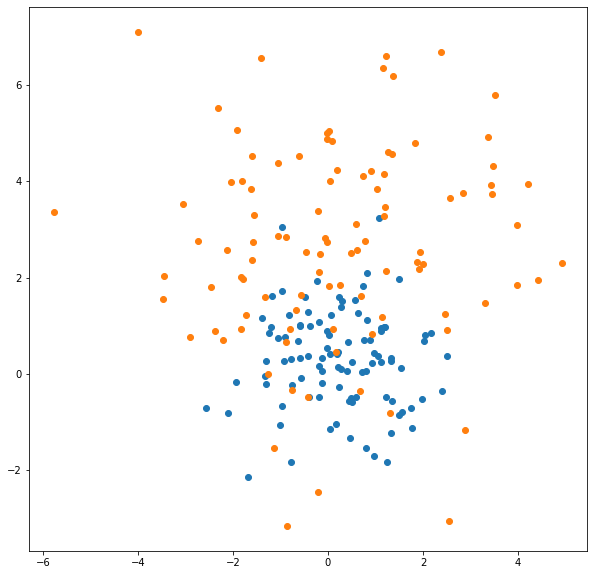

In [162]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(*P)
plt.scatter(*Q)

In [163]:
def approximate_transformation(p: np.array, q: np.array):
    sprime = np.linalg.norm(q - q.mean(axis=1, keepdims=True)).sum() / np.linalg.norm(p - p.mean(axis=1, keepdims=True)).sum()
    
    C = (q - q.mean(axis=1, keepdims=True)) @ (p - p.mean(axis=1, keepdims=True)).T
    u, _, vt = np.linalg.svd(C)
    
    Rprime = u @ vt
    Rprime = Rprime @ np.array([[1, 0], [0, np.linalg.det(Rprime)]])
    
    tprime = q.mean(axis=1) - sprime * Rprime @ p.mean(axis=1)

    return tprime, Rprime, sprime
    
tp, rp, sp = approximate_transformation(P, Q)

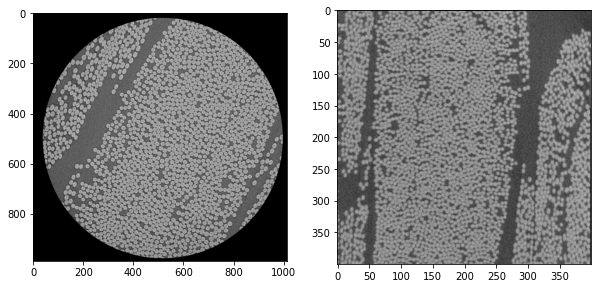

In [175]:
img1 = cv2.imread("../../data/week4/quiz_image_1.png")
img2 = cv2.imread("../../data/week4/quiz_image_2.png")
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img1)
ax2.imshow(img2)

In [176]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

19558 6333


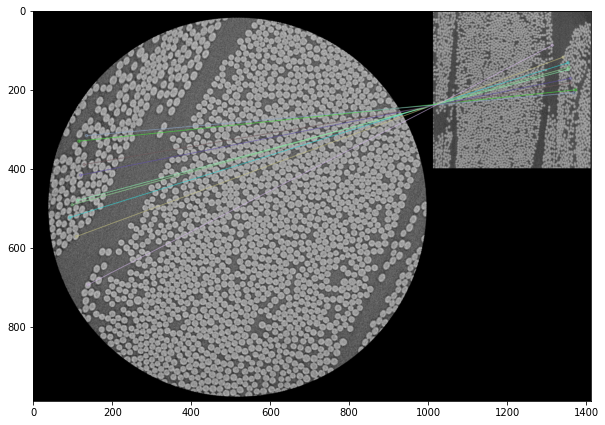

In [183]:
bf = cv2.BFMatcher()

# Apply ratio test
matches = []
threshold = .6
for m, n in bf.knnMatch(des1, des2, k=2):
    if m.distance < threshold * n.distance:
        matches.append([m])
print(len(des1), len(des2))

img_compare = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.figure(figsize=(10, 10))
plt.imshow(img_compare)

In [181]:
print(good)

[[<DMatch 0x7fe562e004b0>], [<DMatch 0x7fe562e020b0>], [<DMatch 0x7fe562e020f0>], [<DMatch 0x7fe562e043b0>], [<DMatch 0x7fe562e049b0>], [<DMatch 0x7fe562e070b0>], [<DMatch 0x7fe562e07af0>], [<DMatch 0x7fe562e08fb0>], [<DMatch 0x7fe58444ad30>], [<DMatch 0x7fe58444b5b0>], [<DMatch 0x7fe58444bbb0>], [<DMatch 0x7fe58444cf30>], [<DMatch 0x7fe58444cf70>], [<DMatch 0x7fe58444d1f0>], [<DMatch 0x7fe58444d270>], [<DMatch 0x7fe58444ddb0>], [<DMatch 0x7fe58444e450>], [<DMatch 0x7fe58444e750>], [<DMatch 0x7fe58444f6f0>], [<DMatch 0x7fe58444fc50>], [<DMatch 0x7fe584450050>], [<DMatch 0x7fe584452e10>], [<DMatch 0x7fe584452e50>], [<DMatch 0x7fe584453cf0>], [<DMatch 0x7fe584455af0>], [<DMatch 0x7fe584455ef0>], [<DMatch 0x7fe584455f30>], [<DMatch 0x7fe584457770>], [<DMatch 0x7fe584457a70>], [<DMatch 0x7fe584459370>], [<DMatch 0x7fe584459990>], [<DMatch 0x7fe584459ed0>], [<DMatch 0x7fe58445b090>], [<DMatch 0x7fe58445bbd0>], [<DMatch 0x7fe58445bf30>], [<DMatch 0x7fe58445f590>], [<DMatch 0x7fe58445f9d0>], 